In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy
from pymatreader import read_mat
import plotly.express as px

import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.animation import FuncAnimation

#from matplotlib.widgets import Slider


In [2]:
#pip install geoviews

 conda install -c pyviz geoviews

### GeoViews is a Python library that makes it easy to explore and visualize geographical, meteorological, and oceanographic datasets, such as those used in weather, climate, and remote sensing research.

GeoElements currently include Feature, WMTS, Tiles, Points, Contours, Image, QuadMesh, TriMesh, RGB, HSV, Labels, Graph, HexTiles, VectorField and Text objects, each of which can easily be overlaid in the same plots.

In [3]:
#for i in range
A = read_mat('data/AE20210628.mat')
june28 = pd.DataFrame(A['data'], columns = ["YYYY", "MM", "DD", "hh", "mm", "ss", "lat", "lon", "resid", "nstn", "Energy (J)", "Energy uncertainty (J)", "nstn_energy"])

B = read_mat('data/AE20210629.mat')
june29 = pd.DataFrame(B['data'], columns = ["YYYY", "MM", "DD", "hh", "mm", "ss", "lat", "lon", "resid", "nstn", "Energy (J)", "Energy uncertainty (J)", "nstn_energy"])

C = read_mat('data/AE20210630.mat')
june30 = pd.DataFrame(C['data'], columns = ["YYYY", "MM", "DD", "hh", "mm", "ss", "lat", "lon", "resid", "nstn", "Energy (J)", "Energy uncertainty (J)", "nstn_energy"])

D = read_mat('data/AE20210701.mat')
july1 = pd.DataFrame(D['data'], columns = ["YYYY", "MM", "DD", "hh", "mm", "ss", "lat", "lon", "resid", "nstn", "Energy (J)", "Energy uncertainty (J)", "nstn_energy"])


lightning = (june28, june29, june30, july1)


In [4]:
for i in lightning: 
    print(i) 

          YYYY   MM    DD    hh    mm         ss      lat       lon  resid  \
0       2021.0  6.0  28.0   0.0   0.0   0.040629  -6.7681  109.8620    6.6   
1       2021.0  6.0  28.0   0.0   0.0   0.130635  -6.7884  109.9849    2.4   
2       2021.0  6.0  28.0   0.0   0.0   0.206958  50.3914   42.6464    6.4   
3       2021.0  6.0  28.0   0.0   0.0   0.319386   7.4076 -155.6573   15.1   
4       2021.0  6.0  28.0   0.0   0.0   0.319461   7.0162 -155.6382    8.3   
...        ...  ...   ...   ...   ...        ...      ...       ...    ...   
655993  2021.0  6.0  28.0  23.0  59.0  48.513969  42.7526  -83.9932    7.9   
655994  2021.0  6.0  28.0  23.0  59.0  48.549905  42.7619  -83.9929    7.1   
655995  2021.0  6.0  28.0  23.0  59.0  48.404961  31.0452 -103.8296    4.6   
655996  2021.0  6.0  28.0  23.0  59.0  48.026815  -2.9972  149.8921    9.9   
655997  2021.0  6.0  28.0  23.0  59.0  48.056943  -3.0046  149.9017   10.5   

        nstn  Energy (J)  Energy uncertainty (J)  nstn_energy  

In [5]:
lightning[0]

,YYYY,MM,DD,hh,mm,ss,lat,lon,resid,nstn,Energy (J),Energy uncertainty (J),nstn_energy
0,2021.0,6.0,28.0,0.0,0.0,0.040629,-6.7681,109.8620,6.6,6.0,354.20,147.48,5.0
1,2021.0,6.0,28.0,0.0,0.0,0.130635,-6.7884,109.9849,2.4,5.0,504.42,205.15,4.0
2,2021.0,6.0,28.0,0.0,0.0,0.206958,50.3914,42.6464,6.4,5.0,988.25,492.24,5.0
3,2021.0,6.0,28.0,0.0,0.0,0.319386,7.4076,-155.6573,15.1,13.0,6168.63,1247.02,11.0
4,2021.0,6.0,28.0,0.0,0.0,0.319461,7.0162,-155.6382,8.3,5.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655993,2021.0,6.0,28.0,23.0,59.0,48.513969,42.7526,-83.9932,7.9,6.0,163.44,6.94,5.0
655994,2021.0,6.0,28.0,23.0,59.0,48.549905,42.7619,-83.9929,7.1,6.0,209.69,11.34,5.0
655995,2021.0,6.0,28.0,23.0,59.0,48.404961,31.0452,-103.8296,4.6,6.0,955.65,114.99,6.0
655996,2021.0,6.0,28.0,23.0,59.0,48.026815,-2.9972,149.8921,9.9,5.0,478.85,141.61,5.0


In [6]:
lightning[0]["lat"]

0         -6.7681
1         -6.7884
2         50.3914
3          7.4076
4          7.0162
           ...   
655993    42.7526
655994    42.7619
655995    31.0452
655996    -2.9972
655997    -3.0046
Name: lat, Length: 655998, dtype: float64

In [7]:
lightning[0]["hh"] < 2.0

0          True
1          True
2          True
3          True
4          True
          ...  
655993    False
655994    False
655995    False
655996    False
655997    False
Name: hh, Length: 655998, dtype: bool

## hour 02 july 1 - plot in 5 min increments

0


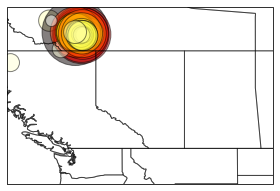

5


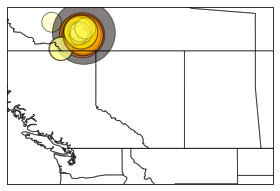

10


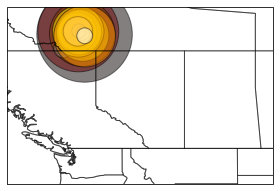

15


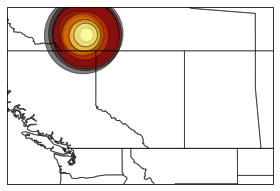

20


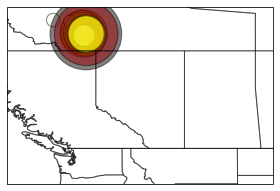

25


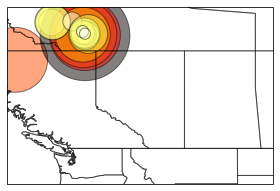

30


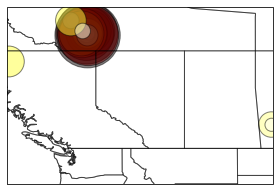

35


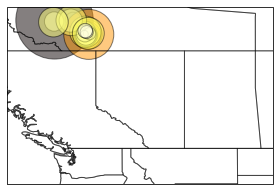

40


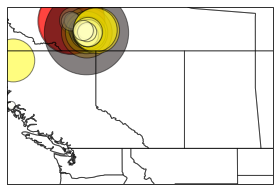

45


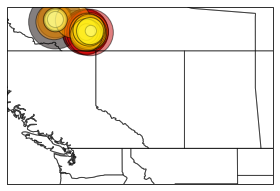

50


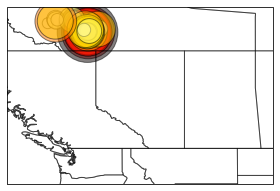

55


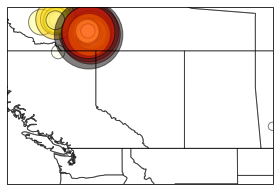

60


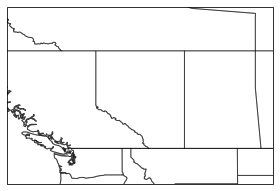

In [8]:
mins = range(0, 61, 5)

for i in mins: 
    print(i)
    fig = plt.figure(figsize=(15,15))
   
    ax1 = plt.subplot(4,1,1 ,projection=ccrs.PlateCarree())
    ax1.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
    ax1.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
    ax1.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")
    june30_min = june30[(june30["hh"] == 2) & (june30["mm"] > i) & (june30["mm"] < i + 5)]
    points30 = (june30_min.loc[(june30_min.lon > -130) & (june30_min.lon < -100) & (june30_min.lat > 45) & (june30_min.lat < 65)])
    ax1.scatter(x = points30["lon"], y = points30["lat"], c = points30["Energy (J)"], cmap="hot_r", s = points30["Energy (J)"], edgecolors="black", marker = 'o', alpha=0.5)
    plt.xlim([-130, -100])
    plt.ylim([45, 65])
    #plt.title("Time", str(i))
    
    plt.savefig("5minintervals", dpi = 200)
    plt.show()

presentation 
- what is a pyrocb 
- why do we care about lightning in pyrocbs
- what have i done with this issue
- talk about BC event and wwln 
- show results from plots 
- what to do next 
- can we use this data set to track lightning in these storms 
- plot over satellite images to show lightning in storms
- energy of lightning compared to energy of lightning in non fire storms 
- look over literature again, read research papers again to understand 
- look at science questions from other lightning systems to apply to fire storm lightning
- read papers emailed over september 30 
- paper that compares wwln to other 
- how has this topic been studied before: radar data, ice data... 
- add relative error 
- look at literature and come up with questions/ future plan

2:23 utc june 30

## June 30 by hour - WAS MAKING COMPUTER GLITCH OUT

In [9]:
"""df = px.data.gapminder()

fig = px.scatter(june30, x=june30["lon"], y=june30["lat"], animation_frame=june30["hh"], animation_group= june30["Energy (J)"],
           size= june30["Energy uncertainty (J)"], color= june30["Energy (J)"], hover_name=june30["mm"],
            size_max=100) #range_x=[1,180], range_y=[1,180])

#fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()"""

'df = px.data.gapminder()\n\nfig = px.scatter(june30, x=june30["lon"], y=june30["lat"], animation_frame=june30["hh"], animation_group= june30["Energy (J)"],\n           size= june30["Energy uncertainty (J)"], color= june30["Energy (J)"], hover_name=june30["mm"],\n            size_max=100) #range_x=[1,180], range_y=[1,180])\n\n#fig["layout"].pop("updatemenus") # optional, drop animation buttons\nfig.show()'

## June 30 Hour 2 By minute

In [10]:

june30_h2 = june30[june30["hh"] == 2]

#june30_h2 = px.data.gapminder()

fig, ax = px.scatter(june30_h2, x=june30_h2["lon"], y=june30_h2["lat"], animation_frame=june30_h2["mm"], animation_group= june30_h2["Energy (J)"],
           size= june30_h2["Energy uncertainty (J)"], color= june30_h2["Energy (J)"], hover_name=june30_h2["Energy (J)"],
            size_max=80) #range_x=[1,180], range_y=[1,180])
#ax.set_extent([-100, 30, 0, 80])
ax.set_extent([-200,200,-70,70])
fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()
#plt.savefig("slider", dpi = 200)
#fig =px.scatter(x=range(10), y=range(10))
fig.write_html("sliderjune30h2.html")

ValueError: too many values to unpack (expected 2)

## June 30 hour 2 by minute - correct region?

In [ ]:
df = px.data.gapminder()

july1_h2 = july1[july1["hh"] == 0]
points1h2 = (july1_h2.loc[(july1_h2.lon > -130) & (july1_h2.lon < -100) & (july1_h2.lat > 45) & (july1_h2.lat < 65)])

#june30_h2 = june30[(june30["hh"] == 2) & (june30_h2.lon > -130) & (june30_h2.lon < -100) & (june30_h2.lat > 45) & (june30_h2.lat < 65)]


fig = px.scatter(points1h2, x=points1h2["lon"], y=points1h2["lat"], animation_frame=points1h2["mm"], animation_group= points1h2["Energy (J)"],
           size= points1h2["Energy uncertainty (J)"] * 10, color= points1h2["Energy (J)"], hover_name=points1h2["Energy (J)"],
            size_max=50, range_x=[-130,-100], range_y=[45,65])

#fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()
fig.write_html("sliderj30h2region.html")

In [ ]:
df = px.data.gapminder()


june30_h2 = june30[june30["hh"] == 2]
points30h2 = (june30_h2.loc[(june30_h2.lon > -130) & (june30_h2.lon < -100) & (june30_h2.lat > 45) & (june30_h2.lat < 65)])

#june30_h2 = june30[(june30["hh"] == 2) & (june30_h2.lon > -130) & (june30_h2.lon < -100) & (june30_h2.lat > 45) & (june30_h2.lat < 65)]

fig = plt.figure(figsize=(15,15))

fig = px.scatter(points30h2, x=points30h2["lon"], y=points30h2["lat"], animation_frame=points30h2["mm"], animation_group= points30h2["Energy (J)"],
        size= points30h2["Energy uncertainty (J)"], color= points30h2["Energy (J)"], hover_name=points30h2["Energy (J)"],
        size_max=50, range_x=[-130,-100], range_y=[45,65])

#fig.add_trace(px.scatter_mapbox(points30h2, lat="ycoord", lon="xcoord",).data[0])

fig.show()

In [ ]:
mins = np.arange(0, 61, 5)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#ax1 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle = ':', alpha = 0.5)
ax1.add_feature(cfeature.COASTLINE, linestyle = '-', alpha = 0.5)
ax1.add_feature(cfeature.STATES, linestyle = ':', alpha = 0.5, edgecolor="black")
ax1.stock_img()

ax1.set_extent([-130,-100, 45, 60])

"""minute = june30[(june30["hh"] == 2) & (mins(i) > i) & (mins(i) < i + 5)]
print(minute)"""


def animate(i):
    minute = june30[(june30["hh"] == 2) & (june30["mm"] > mins[i]) & (june30["mm"] < mins[i] + 5)]
    print(minute)
    points30 = (june30_min.loc[(june30_min.lon > -130) & (june30_min.lon < -100) & (june30_min.lat > 45) & (june30_min.lat < 65)])
    ax1.scatter(minute["lon"], minute["lat"], color = 'red')
    return fig
ani= FuncAnimation(fig, animate, 60, interval=60, repeat = True)
plt.show()




In [ ]:
# Setting Plot and Axis variables as subplots()
# function returns tuple(fig, ax)
Plot, Axis = plt.subplots()
  
# Adjust the bottom size according to the
# requirement of the user
plt.subplots_adjust(bottom=0.25)
  
# Set the x and y axis to some dummy data
t = np.arange(0.0, 100.0, 0.1)
s = np.sin(2*np.pi*t)
  
# plot the x and y using plot function
l = plt.plot(t, s)
  
# Choose the Slider color
slider_color = 'White'
  
# Set the axis and slider position in the plot
axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],
                         facecolor = slider_color)
slider_position = Slider(axis_position,
                         'Pos', 0.1, 90.0)
  
# update() function to change the graph when the
# slider is in use
def update(val):
    pos = slider_position.val
    Axis.axis([pos, pos+10, -1, 1])
    Plot.canvas.draw_idle()
  
# update function called using on_changed() function
slider_position.on_changed(update)
  
# Display the plot
plt.show()

- https://medium.com/analytics-vidhya/creating-map-animations-using-python-3b52061768a3
- https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu
- https://plotly.com/python/sliders/
- https://stackoverflow.com/questions/22386876/cartopy-how-to-add-an-image-on-top-of-map
- https://earthobservatory.nasa.gov/images/148530/blazes-rage-in-british-columbia
- https://www.cartolab.com/blog/animating-a-time-series-map-with-python-and-geopandas

In [ ]:
#pip install imagemagick

In [ ]:
pip install ffmpeg

In [ ]:
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='ffmpeg')

In [ ]:
# pip install celluloid

In [ ]:
from celluloid import Camera

In [11]:
mins = range(0, 61, 5)
fig= plt.figure(figsize=(15,15))
camera = Camera(ax)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")
    
for i in mins: 
    #print(i)
    june30_min = june30[(june30["hh"] == 2) & (june30["mm"] > i) & (june30["mm"] < i + 5)]
    points30 = (june30_min.loc[(june30_min.lon > -130) & (june30_min.lon < -100) & (june30_min.lat > 45) & (june30_min.lat < 65)])
    ax.scatter(x = points30["lon"], y = points30["lat"], c = points30["Energy (J)"], cmap="hot_r", s = points30["Energy (J)"], edgecolors="black", marker = 'o', alpha=0.5)
    plt.xlim([-130, -100])
    plt.ylim([45, 65])
    #plt.title("Time", str(i))
    camera.snap()

#animation = camera.animate(interval = 200, repeat = True,  repeat_delay = 500)
animation = camera.animate(interval = 400, repeat = True, repeat_delay = 500, blit=True)
animation.save("camera.gif")
HTML(animation.to_html5_video())



NameError: name 'Camera' is not defined

<Figure size 1080x1080 with 0 Axes>

- https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
- https://matplotlib.org/stable/api/animation_api.html

# camera

In [12]:
fig = plt.figure()
camera = Camera(fig)

data = june30[(june30["hh"] == 2) & (june30["mm"] > i) & (june30["mm"] < i + 5)]
mins = range(0, 61, 5)
   
    
for i in mins: 
    fig = plt.figure(figsize=(15,15))
    points = (data.loc[(data.lon > -125) & (data.lon < -115) & (data.lat > 40) & (data.lat < 60)])

    #lat = data.loc[(data.lat > 40) & (data.lat < 60)]
    #lon = data.loc[(data.lon > -125) & (data.lon < -115)]
    
    sizes = np.log10(points["Energy (J)"])
    colors = np.log10(points["Energy uncertainty (J)"])
    
    #set up the plot "plt.axes" puts a set of axes on the figure, which you can add cartopy features to
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-126, -114, 44, 61])
    ax.coastlines()
    ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)

    #do a scatter plot of the points
    plt.scatter(points["lon"], points["lat"], s=sizes, c = colors, cmap="hot_r")
    camera.snap()
    
animation = camera.animate(interval = 400, repeat = True,
                           repeat_delay = 500, blit=True)
#interval is how long to wait (in miliseconds) between showing each figure. You probably can adjust this to make it match the twitter GIF
#repeat is True if you want the gif to repeat
#repeat_delay is how long (in miliseconds) between the gif ending and starting over
#blit i'm not sure, but it needed to be true for this to work
animation.save('lightning_gif.gif') #saves the animation to a gif
HTML(animation.to_html5_video()) #this will show the gif in the jupyter notebook


NameError: name 'Camera' is not defined

<Figure size 432x288 with 0 Axes>

Minute 0 to 10


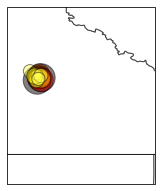

Minute 10 to 20


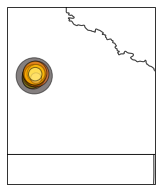

Minute 20 to 30


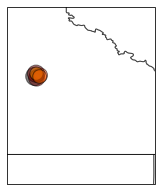

Minute 30 to 40


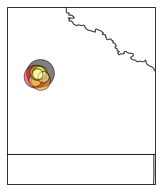

Minute 40 to 50


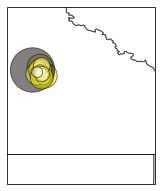

Minute 50 to 60


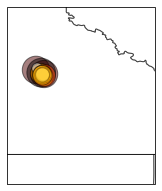

Minute 60 to 70


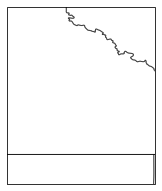

Minute 70 to 80


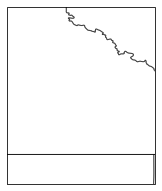

In [13]:
## july 1 hour 0
mins = range(0, 71, 10)

for i in mins: 
    print("Minute", i, "to", i + 10)
    fig = plt.figure(figsize=(15,15))
   
    ax1 = plt.subplot(4,1,1 ,projection=ccrs.PlateCarree())
    ax1.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
    ax1.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
    ax1.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")
    july1_min = july1[(july1["hh"] == 0) & (july1["mm"] > i) & (july1["mm"] < i + 10) & (july1["Energy (J)"] > 0)]
    points01 = (july1_min.loc[(july1_min.lon > -122) & (july1_min.lon < -119) & (july1_min.lat > 48) & (july1_min.lat < 53)])

    ax1.scatter(x = points01["lon"], y = points01["lat"], c = points01["Energy (J)"]* 100, cmap="hot_r", s = points01["Energy (J)"], edgecolors="black", marker = 'o', alpha=0.5)
    plt.xlim([-122, -117])
    plt.ylim([48, 54])
    #plt.title("Time", str(i))
    
    plt.savefig("5minintervals", dpi = 200)
    plt.show()

### counting strikes


In [ ]:
strikes=[]
for i in lightning: 
    #print(i)
    #day = lightning[i]
    points = (lightning[i].loc[(lightning[i]["lon"] > -122) & (lightning[i]["lon"] < -119) & (lightning[i]["lat"] > 48) & (lightning[i]["lat"] < 53)])
    strikes.append(len(points))
    i+= 1
strikes

In [ ]:
length = (june28.loc[(june28["lon"] > -122) & (june28["lon"] < -119) & (june28["lat"] > 48) & (june28["lat"] < 53)])
len(length)

In [ ]:
length = (june29.loc[(june29["lon"] > -122) & (june29["lon"] < -119) & (june29["lat"] > 48) & (june29["lat"] < 53)])
len(length)

In [ ]:
length = (june30.loc[(june30["lon"] > -122) & (june30["lon"] < -119) & (june30["lat"] > 48) & (june30["lat"] < 53)])
len(length)

In [ ]:
length = (july1.loc[(july1["lon"] > -122) & (july1["lon"] < -119) & (july1["lat"] > 48) & (july1["lat"] < 53)])
len(length)